# **EXPLORATION DATA ANALYSIS**

## 1. Librerías y datos

### 1.1 Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

### 1.2 Obtención de los datos históricos desde API Yahoo Finance

In [ ]:

activos = ['SPY', 'DAX', 'GLD']
start_date = '2015-01-01'
end_date = '2025-06-30'

# Configurar el estilo de los gráficos
sns.set_style('darkgrid')

In [ ]:
# Descarga
data = yf.download(activos, start=start_date, end=end_date)['Close']

/tmp/ipython-input-1318635222.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(activos, start=start_date, end=end_date)['Close']
[*********************100%***********************]  3 of 3 completed


In [ ]:
# identificación de cantidad de datos, nulos y tipo de dato
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2637 entries, 2015-01-02 to 2025-06-27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DAX     2637 non-null   float64
 1   GLD     2637 non-null   float64
 2   SPY     2637 non-null   float64
dtypes: float64(3)
memory usage: 82.4 KB


In [ ]:
# Validación primeros 5 datos
data.head()

Ticker,DAX,GLD,SPY
Date,,,
2015-01-02,20.430510,114.080002,171.093689
2015-01-05,19.428617,115.800003,168.003815
2015-01-06,19.428617,117.120003,166.421432
2015-01-07,19.428617,116.430000,168.495209
2015-01-08,19.975245,115.940002,171.485123


In [ ]:
# Validación de los últimos 5 datos
data.tail()

Ticker,DAX,GLD,SPY
Date,,,
2025-06-23,43.216747,311.079987,598.490723
2025-06-24,43.877975,306.190002,605.102417
2025-06-25,43.621380,307.119995,605.441467
2025-06-26,44.253002,306.779999,610.178345
2025-06-27,44.830002,301.220001,613.209900


## 2. Análsis estadístico descriptivo

### 2.1 Estadísticas descriptivas de precios de cierre

In [ ]:

print("\nEstadísticas descriptivas de precios:")
print(data.describe())


Estadísticas descriptivas de precios:
Ticker          DAX          GLD          SPY
count   2637.000000  2637.000000  2637.000000
mean      25.247484   156.742116   323.345914
std        5.119963    44.536537   125.155545
min       15.095662   100.500000   155.438812
25%       21.443325   120.580002   216.251221
50%       24.357992   153.160004   287.459961
75%       28.272051   177.899994   413.871796
max       44.830002   316.290009   613.209900


### 2.2 Visualización serie de tiempo

In [ ]:
# Gráfico de comportamiento histórico del precio de cierre de cada activo
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index, y=data['SPY'], mode='lines', name='SPY'))
#fig.add_trace(go.Scatter(x=data.index, y=data['DAX'], mode='lines', name='DAX'))
#fig.add_trace(go.Scatter(x=data.index, y=data['GLD'], mode='lines', name='GLD'))

fig.update_layout(
    title='Precios de Cierre del SPY',
    xaxis_title='Fecha',
    yaxis_title='Precio de Cierre',
    legend_title='Activos',
    template='plotly_white',
    xaxis_rangeslider_visible=True,
    plot_bgcolor="white",
    paper_bgcolor="WHITE",
    font=dict(color="BLACK")
)


In [ ]:
# Gráfico de comportamiento histórico del precio de cierre de cada activo
fig = go.Figure()

#fig.add_trace(go.Scatter(x=data.index, y=data['SPY'], mode='lines', name='SPY'))
fig.add_trace(go.Scatter(x=data.index, y=data['DAX'], mode='lines', name='DAX', line_color='green'))
#fig.add_trace(go.Scatter(x=data.index, y=data['GLD'], mode='lines', name='GLD'))

fig.update_layout(
    title='Precios de Cierre de DAX',
    xaxis_title='Fecha',
    yaxis_title='Precio de Cierre',
    legend_title='Activos',
    template='plotly_white',
    xaxis_rangeslider_visible=True,
    plot_bgcolor="white",
    paper_bgcolor="white",
    font=dict(color="black")
)


In [ ]:
# Gráfico de comportamiento histórico del precio de cierre de cada activo
fig = go.Figure()

#fig.add_trace(go.Scatter(x=data.index, y=data['SPY'], mode='lines', name='SPY'))
#fig.add_trace(go.Scatter(x=data.index, y=data['DAX'], mode='lines', name='DAX'))
fig.add_trace(go.Scatter(x=data.index, y=data['GLD'], mode='lines', name='GLD', line_color='yellow'))

fig.update_layout(
    title='Precios de Cierre de GLD',
    xaxis_title='Fecha',
    yaxis_title='Precio de Cierre',
    legend_title='Activos',
    template='plotly_white',
    xaxis_rangeslider_visible=True,
    plot_bgcolor="white",
    paper_bgcolor="white",
    font=dict(color="black")
)


## 3. Análisis de Retornos

### 3.1 Cálculo de retornos logarítmicos

In [ ]:
# Cálculo
returns = np.log(data / data.shift(1)).dropna()
print("\nRetornos logarítmicos calculados. Primeros 5 registros:")
print(returns.head())


Retornos logarítmicos calculados. Primeros 5 registros:
Ticker           DAX       GLD       SPY
Date                                    
2015-01-05 -0.050282  0.014965 -0.018225
2015-01-06  0.000000  0.011334 -0.009463
2015-01-07  0.000000 -0.005909  0.012384
2015-01-08  0.027747 -0.004217  0.017589
2015-01-09  0.000000  0.011321 -0.008046


### 3.2 Cálculo de retornos anunales

In [ ]:

    # 1. Calcular los retornos diarios simples
    daily_returns = data.pct_change().dropna()

    # 2. Agrupar los retornos por año y calcular el retorno acumulado anual
    # (1 + retorno_diario) es la base para el cálculo acumulado
    annual_returns = (1 + daily_returns).groupby(daily_returns.index.year).prod() - 1

    # Formatear la tabla para una mejor visualización
    # Convertir a porcentaje y redondear a 2 decimales
    summary_table = annual_returns * 100
    summary_table = summary_table.round(2)
    summary_table = summary_table.T # Transponer la tabla para que los activos sean las filas

    # Renombrar el índice para mayor claridad
    summary_table.index.name = 'Activo'

    print("Tabla Resumen de Retornos Anuales por Activo (%)")
    print("---")
    print(summary_table)


Tabla Resumen de Retornos Anuales por Activo (%)
---
Date     2015   2016   2017   2018   2019   2020   2021   2022   2023   2024  \
Activo                                                                         
DAX     -3.63   2.69  28.23 -22.92  22.11  12.27   7.72 -18.47  23.62  10.55   
GLD    -11.06   8.03  12.81  -1.94  17.86  24.81  -4.15  -0.77  12.69  26.66   
SPY      1.29  12.00  21.71  -4.57  31.22  18.33  28.73 -18.18  26.18  24.89   

Date     2025  
Activo         
DAX     36.33  
GLD     24.40  
SPY      5.55  


### 3.3 Visualización cálculos anuales

ANÁLISIS PROPIO DE LOS COMPORTAMIENTOS HISTÓRICOS!!!!

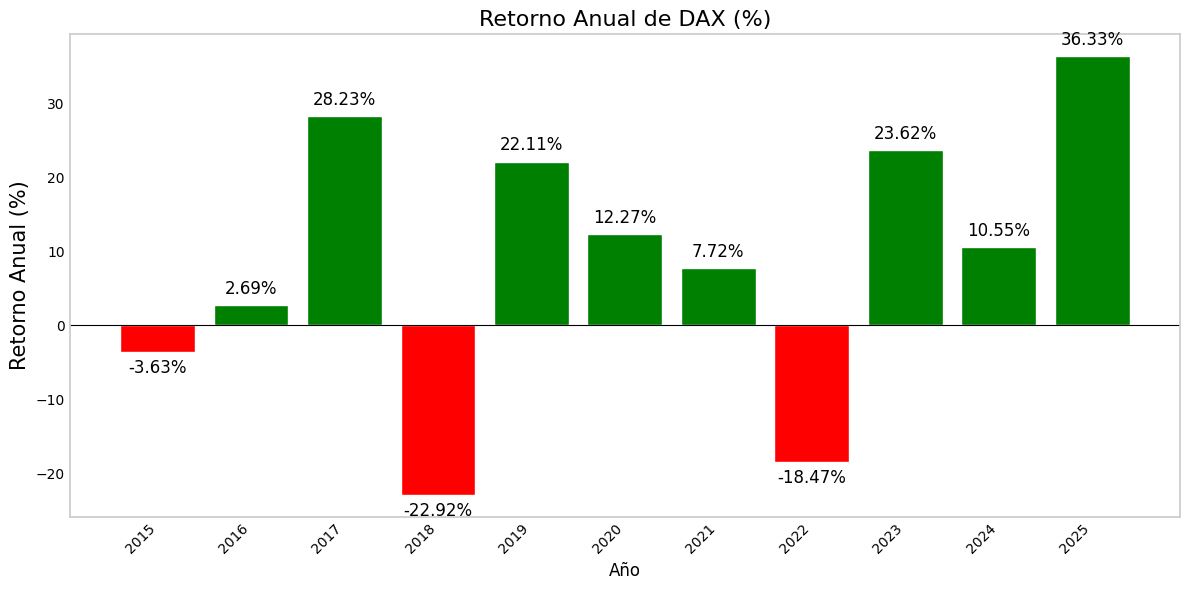

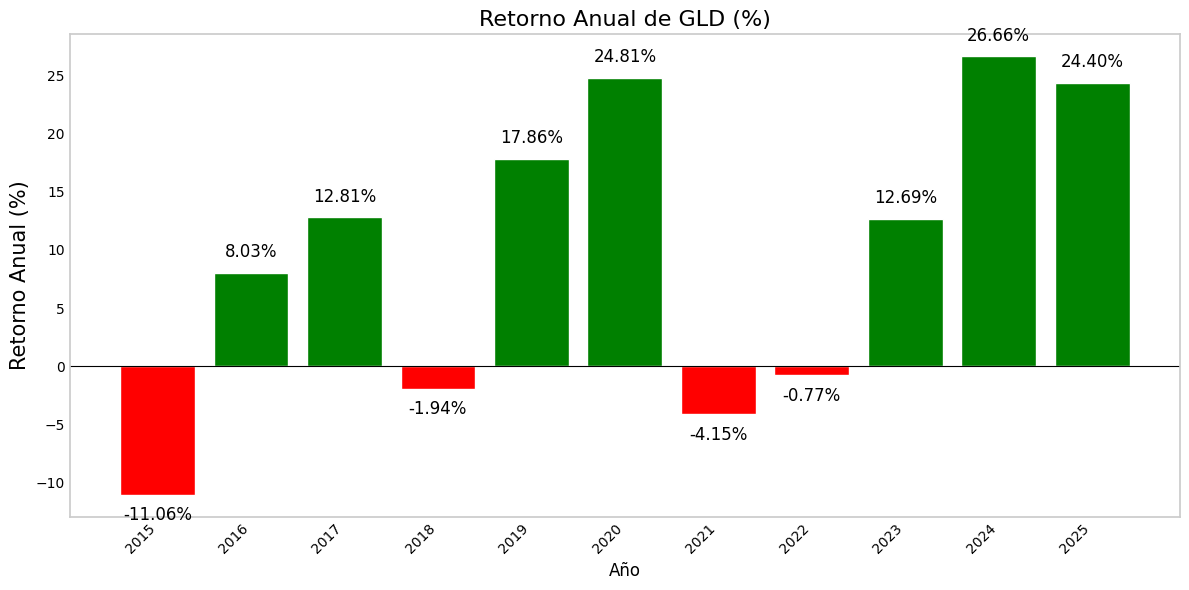

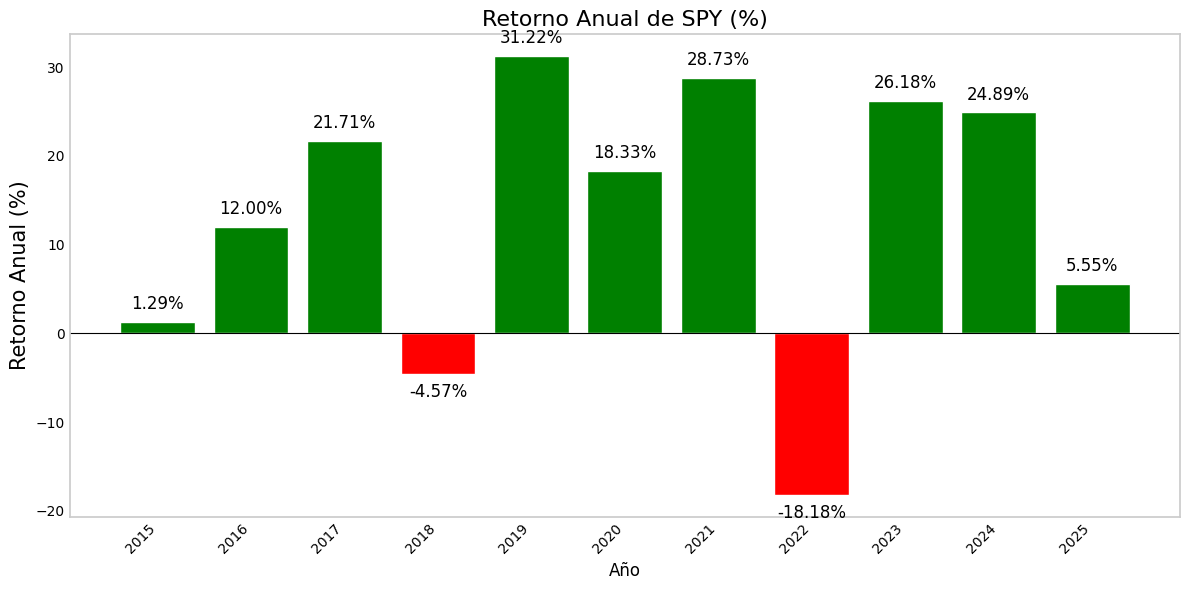

In [ ]:
# Configuración visual para los gráficos
sns.set_style("whitegrid")

# Obtener la lista de activos del índice del DataFrame
tickers = summary_table.index.tolist()

# Crear un gráfico de barras para cada activo
for ticker in tickers:
    plt.figure(figsize=(12, 6))
    ax = plt.gca()  # obtener los ejes actuales

    # Cambiar el fondo a negro
    ax.set_facecolor("white")
    ax.grid(False)        # fondo del área de la gráfica
    plt.gcf().set_facecolor("white")  # fondo del lienzo

    # Seleccionar la fila del activo actual
    ticker_data = summary_table.loc[ticker]

    # Definir los colores para las barras (rojo para retornos negativos, verde para positivos)
    colors = ['red' if x < 0 else 'green' for x in ticker_data]

    # Crear el gráfico de barras
    plt.bar(ticker_data.index.astype(str), ticker_data.values, color=colors)

    # Añadir el valor de cada barra
    for i, v in enumerate(ticker_data.values):
        plt.text(
            i, v + np.sign(v) * 1, f'{v:.2f}%',
            ha='center',
            va='bottom' if v > 0 else 'top',
            fontsize=12,
            color="black"  # texto en blanco para contraste
        )

    # Añadir títulos y etiquetas
    plt.title(f'Retorno Anual de {ticker} (%)', fontsize=16, color="black")
    plt.xlabel('Año', fontsize=12, color="black")
    plt.ylabel('Retorno Anual (%)', fontsize=15, color="black")
    plt.xticks(rotation=45, ha='right', color="black")
    plt.yticks(color="black")

    # Añadir línea de referencia en el 0%
    plt.axhline(0, color='black', linewidth=0.8)

    plt.tight_layout()
    plt.show()


### 3.4 Cálculo retornos históricos

In [ ]:

# Calcular el retorno del periodo analizado

total_returns = (data.iloc[-1] / data.iloc[0]) - 1

# Formatear la tabla de resultados
summary_table = pd.DataFrame(total_returns)
summary_table.columns = ['Retorno Histórico Total']
summary_table.index.name = 'Activo'

# 3. Convertir a porcentaje para una mejor visualización
summary_table['Retorno Histórico Total'] = (summary_table['Retorno Histórico Total'] * 100).round(2)

print("Tabla Resumen de Retorno Histórico Total por Activo (%)")
print("---")
print(summary_table)

Tabla Resumen de Retorno Histórico Total por Activo (%)
---
        Retorno Histórico Total
Activo                         
DAX                      119.43
GLD                      164.04
SPY                      258.41


In [ ]:
# Calcular el retorno del periodo analizado
total_returns = (data.iloc[-1] / data.iloc[0]) - 1
summary_table = pd.DataFrame(total_returns)
summary_table.columns = ['Retorno Histórico Total']
summary_table.index.name = 'Activo'

# Preparación de datos y colores
returns_percent = (summary_table['Retorno Histórico Total'] * 100).round(2)
colors = ['green' if r > 0 else 'red' for r in returns_percent]

# Crear la figura del gráfico de barras
fig = go.Figure(data=[
    go.Bar(
        x=summary_table.index,
        y=returns_percent,
        marker_color=colors,
        text=returns_percent.astype(str) + '%',
        textposition='outside',

        # --- LÍNEA AÑADIDA ---
        # Aquí puedes cambiar el 14 al tamaño que prefieras
        textfont=dict(size=14)
    )
])
fig.update_layout(
    title='Retorno Histórico de los Activos',
    xaxis_title='Activo',
    yaxis_title='Retorno Histórico (%)',
    template='plotly_dark',
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black')
)

# Mostrar la gráfica
fig.show()

### 3.5 Validación de asimetría y curtosis entre los activos

In [ ]:
# Para asimetría y curtosis
print("\nAsimetría (Skewness) de los retornos:")
print(returns.skew())
print("\nCurtosis (Kurtosis) de los retornos:")
print(returns.kurtosis())


Asimetría (Skewness) de los retornos:
Activo
DAX   -0.646339
GLD   -0.113893
SPY   -0.574384
dtype: float64

Curtosis (Kurtosis) de los retornos:
Activo
DAX     9.141824
GLD     2.577142
SPY    14.303735
dtype: float64


### Asimetría (Skewness)
La asimetría, o skewness, mide el grado de inclinación o sesgo de la distribución de los retornos.

Valores negativos (DAX: -0.65, GLD: -0.11, SPY: -0.57): Indican una asimetría negativa o sesgo a la izquierda. Esto significa que la cola izquierda de la distribución es más larga y más "pesada" que la cola derecha. En términos financieros, esto sugiere que la probabilidad de experimentar retornos negativos extremos es mayor que la de retornos positivos extremos.

Interpretación de los valores:

* GLD (-0.11): Presenta una asimetría muy cercana a cero, lo que implica una distribución casi simétrica. La probabilidad de retornos negativos o positivos extremos es similar.

* DAX (-0.65) y SPY (-0.57): Muestran una asimetría más pronunciada. El DAX tiene la asimetría más negativa, lo que indica un mayor riesgo de sufrir pérdidas grandes y repentinas en comparación con el SPY y el GLD.

### Curtosis (Kurtosis)
La curtosis mide el grado de "grosor" de las colas de la distribución en comparación con una distribución normal. Un valor de curtosis de 3 es el de una distribución normal. Los valores que se presentan aquí son la curtosis en exceso, por lo que se deben comparar con 0.

Valores positivos (DAX: 9.14, GLD: 2.58, SPY: 14.30): Todos los activos presentan una curtosis positiva (leptocúrtica), lo que significa que sus distribuciones tienen colas más gruesas que una distribución normal. Esto implica una mayor probabilidad de retornos extremos (tanto positivos como negativos), es decir, de eventos de "cisne negro" 🦢.

Interpretación de los valores:

* GLD (2.58): Muestra la curtosis más baja, lo que indica una menor propensión a retornos extremos en comparación con los otros dos activos.

* DAX (9.14) y SPY (14.30): Tienen una curtosis muy alta, especialmente el SPY, lo que sugiere un riesgo significativamente elevado de experimentar grandes movimientos de precios, tanto al alza como a la baja. La alta curtosis en estos índices es un comportamiento común en mercados de renta variable.

Modelo de Markowitz: La teoría de Markowitz asume que los retornos se distribuyen de manera normal (asimetría ~0 y curtosis ~3). Los datos que has calculado demuestran que esta suposición no se cumple. Esto es un punto importante que puedes discutir como una limitación del modelo clásico. La alta curtosis es particularmente relevante, ya que subestima el riesgo de eventos extremos.

Modelo de DQN: Tu red neuronal de RL con metodología DQN tiene la ventaja de no depender de suposiciones sobre la distribución de los retornos. Al no asumir normalidad, tiene el potencial de aprender a gestionar el riesgo de las colas gruesas y la asimetría negativa. Tu agente de RL podría aprender a evitar las condiciones de mercado que históricamente han llevado a grandes pérdidas, algo que un modelo basado en Markowitz no consideraría de manera explícita.

In [ ]:
### 3.2 Estadísticas descriptivas de retornos
print("\nEstadísticas descriptivas de retornos:")
print(returns.describe())


Estadísticas descriptivas de retornos:
Activo          DAX          GLD          SPY
count   2636.000000  2636.000000  2636.000000
mean       0.000298     0.000368     0.000484
std        0.013664     0.009104     0.011406
min       -0.120154    -0.055190    -0.115887
25%       -0.006101    -0.004688    -0.003727
50%        0.000520     0.000520     0.000605
75%        0.007350     0.005245     0.005950
max        0.092150     0.047874     0.099863


- SPY muestra el precio promedio más alto (mean de 324.24), lo cual es de esperar ya que representa un índice bursátil estadounidense importante. También presenta la mayor volatilidad, con la desviación estándar (std) más alta (125.50), lo que sugiere que sus precios han fluctuado mucho más que los de DAX y GLD.

- Por otro lado, DAX tiene el precio promedio más bajo (mean de 25.25) y la menor desviación estándar (5.12), lo que indica un precio más estable en comparación con los otros activos.

- GLD, que es un fondo de oro, se sitúa en un punto intermedio, con un precio promedio (mean de 156.74) y una desviación estándar (std de 44.54) considerable, lo que refleja la volatilidad inherente al mercado de materias primas.


**Distribución y Volatilidad:**


Al observar los cuartiles (25%, 50%, 75%), notamos más diferencias:

- Para DAX, los valores están relativamente cerca, lo que confirma su menor volatilidad. La mediana (50% de 24.36) está bastante cerca del promedio, lo que sugiere una distribución de precios más o menos simétrica.

- SPY tiene una gran diferencia entre su mínimo (155.87) y su máximo (614.91), y sus cuartiles están muy separados, lo que nuevamente subraya su alta volatilidad. La diferencia entre el 75% (415.02) y el 50% (288.26) es mucho más grande que la de los otros activos, lo que podría indicar un sesgo hacia precios más altos o períodos de fuerte crecimiento.

- GLD muestra un comportamiento similar a SPY en cuanto a la dispersión, aunque en una escala menor. La gran diferencia entre el min (100.50) y el max (316.29) también confirma su naturaleza volátil.


En resumen, estas estadísticas confirman que SPY es el activo más grande y volátil, DAX es el más estable, y GLD se encuentra en un punto intermedio, reflejando las características típicas de cada tipo de activo.

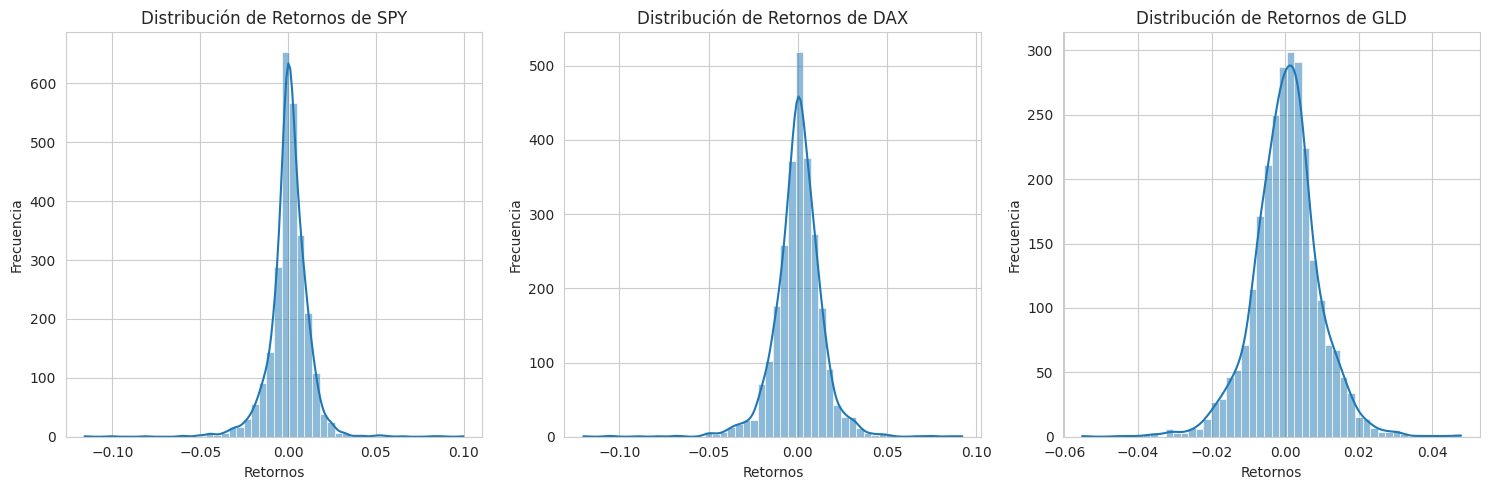

In [ ]:
### 3.3. Visualización de la distribución de retornos
plt.figure(figsize=(15, 5))
for i, ticker in enumerate(activos):
    plt.subplot(1, 3, i + 1)
    sns.histplot(returns[ticker], bins=50, kde=True)
    plt.title(f'Distribución de Retornos de {ticker}')
    plt.xlabel('Retornos')
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

Estos gráficos de distribución de retornos (ganancias o pérdidas diarias) muestran que los tres activos (SPY, DAX y GLD) presentan una distribución con cola pesada, lo que indica que los eventos extremos (grandes retornos o pérdidas) son más comunes de lo que se esperaría en una distribución normal.  Todas las distribuciones tienen una alta concentración de retornos cercanos a cero, con un pico pronunciado, lo que es típico en los mercados financieros. Aunque SPY y DAX tienen distribuciones muy similares, GLD muestra una distribución ligeramente más dispersa en los extremos, lo que podría implicar una volatilidad moderadamente mayor en sus retornos diarios. En general, la forma de estas curvas sugiere que la mayoría de los días los precios se mantienen relativamente estables, pero existe una probabilidad no despreciable de movimientos significativos.

### 3.6 Análisis de Correlación

In [ ]:

correlation_matrix = returns.corr()
print("\nMatriz de correlación de los retornos:")
print(correlation_matrix)


Matriz de correlación de los retornos:
Activo       DAX       GLD       SPY
Activo                              
DAX     1.000000  0.104560  0.728144
GLD     0.104560  1.000000  0.042019
SPY     0.728144  0.042019  1.000000


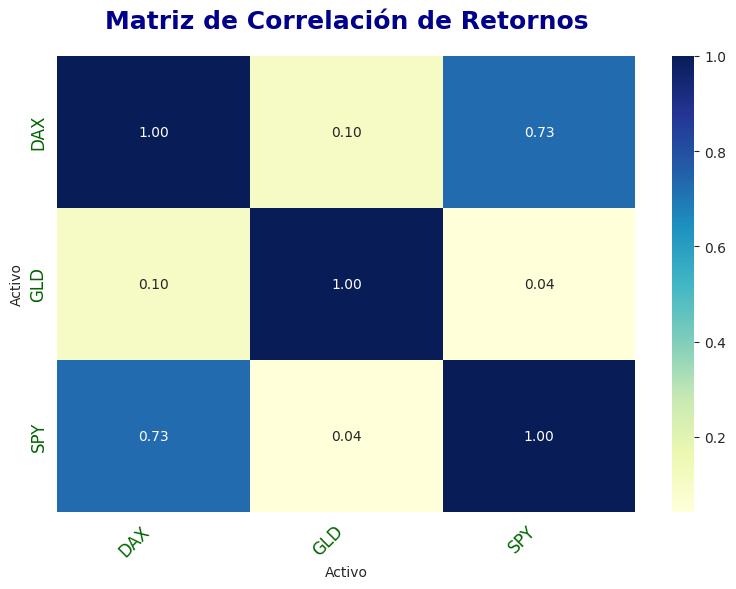

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='YlGnBu',
    fmt=".2f"
)

# Título resaltado: más grande, negrita y color oscuro
plt.title('Matriz de Correlación de Retornos', fontsize=18, weight='bold', color='darkblue', pad=20)

# Etiquetas del eje X: rotadas, tamaño grande y color
plt.xticks(rotation=45, ha='right', fontsize=12, color='darkgreen')

# Etiquetas del eje Y: tamaño grande y color
plt.yticks(fontsize=12, color='darkgreen')

plt.tight_layout()
plt.show()

El análisis de la matriz de correlación de los retornos muestra tres puntos clave:

**Fuerte correlación entre DAX y SPY:** Con un valor de 0.728144, existe una correlación positiva fuerte entre los retornos del DAX y el SPY. Esto es esperado, ya que ambos son índices de renta variable que representan mercados desarrollados y se ven afectados por factores económicos globales similares.

**Correlación débil entre GLD y los demás activos:** El oro (GLD) muestra una correlación muy baja con los índices bursátiles. La correlación con el DAX es de 0.104560 y con el SPY es de 0.042019. Esto indica que los retornos del oro no se mueven de manera consistente con los de las acciones, lo que lo convierte en un activo de diversificación potencial para una cartera que contenga acciones.

## 4. Integración de variables calculadas

In [ ]:
# Crear un DataFrame para almacenar todas las variables calculadas
df_variables = pd.DataFrame(index=data.index)

In [ ]:
# Unir el precio de cierre al nuevo DataFrame
for ticker in activos:
    df_variables[f'Close_{ticker}'] = data[ticker]

In [ ]:
for ticker in activos:
    df_variables[f'Return_{ticker}'] = np.log(data[ticker] / data[ticker].shift(1))

In [ ]:
df_variables.tail()

,Close_SPY,Close_DAX,Close_GLD,Return_SPY,Return_DAX,Return_GLD
Date,,,,,,
2025-06-23,598.490723,43.216747,311.079987,0.009829,0.012177,0.003058
2025-06-24,605.102417,43.877975,306.190002,0.010987,0.015184,-0.015844
2025-06-25,605.441467,43.621380,307.119995,0.000560,-0.005865,0.003033
2025-06-26,610.178345,44.253002,306.779999,0.007793,0.014376,-0.001108
2025-06-27,613.209900,44.830002,301.220001,0.004956,0.012954,-0.018290


### 4.1 Gráfico de volatilidad

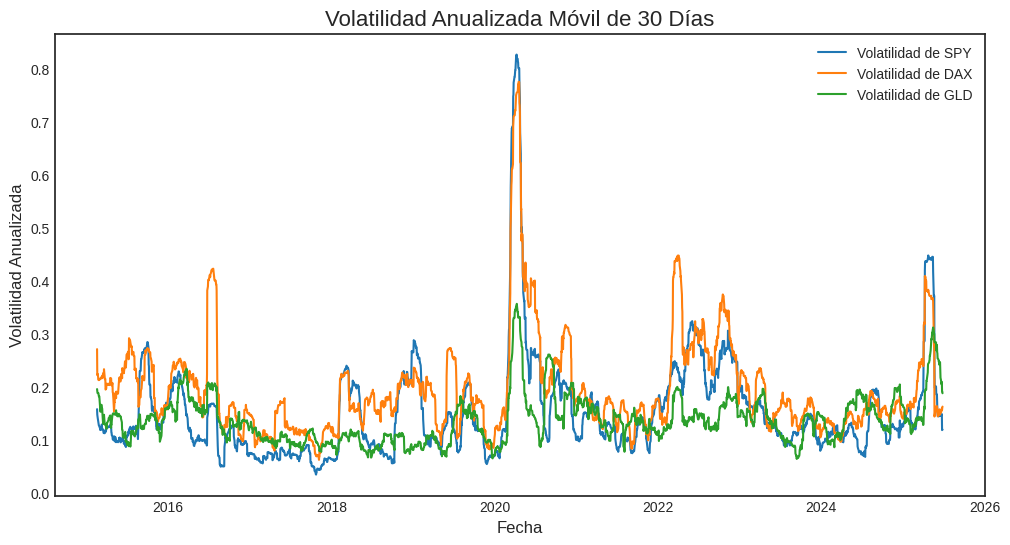

In [ ]:
# volatilidad rolling (desviación estándar móvil) para capturar el riesgo en un período de 30 días hábiles.
window = 30

for ticker in activos:
    df_variables[f'Volatility_{ticker}'] = df_variables[f'Return_{ticker}'].rolling(window=window).std() * np.sqrt(252)

# Ahora, el código para graficar
plt.style.use('seaborn-v0_8-white')  # Opcional, para un estilo más limpio

plt.figure(figsize=(12, 6)) # Ajusta el tamaño de la figura

# Graficar la volatilidad para cada activo
for ticker in activos:
    plt.plot(df_variables.index, df_variables[f'Volatility_{ticker}'], label=f'Volatilidad de {ticker}')

plt.title('Volatilidad Anualizada Móvil de 30 Días', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Volatilidad Anualizada', fontsize=12)
plt.legend(fontsize=10)
plt.show()

La volatilidad no es constante: Cambia drásticamente en respuesta a eventos del mercado.

Los índices de renta variable (SPY y DAX) son más volátiles: Son más susceptibles a shocks del mercado que el oro.

El oro (GLD) es un activo de menor riesgo: Su volatilidad es consistentemente más baja, lo que lo convierte en una opción para diversificar y reducir el riesgo global de una cartera durante periodos de inestabilidad.

In [ ]:
# El Max Drawdown es la mayor caída desde un pico hasta un valle en un período de tiempo. Es una métrica crucial para la gestión de riesgosS
for ticker in activos:
    rolling_max = data[ticker].cummax()
    df_variables[f'MaxDrawdown_{ticker}'] = (data[ticker] - rolling_max) / rolling_max

# Gráfico del Drawdown para SPY
fig = go.Figure()

# Encontrar el Max Drawdown y su fecha
max_dd_spy = df_variables['MaxDrawdown_SPY'].min()
fecha_max_dd_spy = df_variables['MaxDrawdown_SPY'].idxmin()

fig.add_trace(go.Scatter(x=df_variables.index, y=df_variables['MaxDrawdown_SPY'], name='Max Drawdown SPY'))

# Añadir el punto de Max Drawdown
fig.add_trace(go.Scatter(
    x=[fecha_max_dd_spy],
    y=[max_dd_spy],
    mode='markers',
    marker=dict(color='red', size=10, symbol='circle'),
    name=f'Máximo Drawdown: {max_dd_spy:.2%}'
))

fig.update_layout(
    title='Max Drawdown Acumulado de SPY',
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black')
)
fig.show()

# Gráfico del Drawdown para DAX
fig = go.Figure()

# Encontrar el Max Drawdown y su fecha
max_dd_dax = df_variables['MaxDrawdown_DAX'].min()
fecha_max_dd_dax = df_variables['MaxDrawdown_DAX'].idxmin()

fig.add_trace(go.Scatter(x=df_variables.index, y=df_variables['MaxDrawdown_DAX'], name='Max Drawdown DAX', line_color='green'))

# Añadir el punto de Max Drawdown
fig.add_trace(go.Scatter(
    x=[fecha_max_dd_dax],
    y=[max_dd_dax],
    mode='markers',
    marker=dict(color='red', size=10, symbol='circle'),
    name=f'Máximo Drawdown: {max_dd_dax:.2%}'
))

fig.update_layout(
    title='Max Drawdown Acumulado de DAX',
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black')
)
fig.show()

# Gráfico del Drawdown para GLD
fig = go.Figure()

# Encontrar el Max Drawdown y su fecha
max_dd_gld = df_variables['MaxDrawdown_GLD'].min()
fecha_max_dd_gld = df_variables['MaxDrawdown_GLD'].idxmin()

fig.add_trace(go.Scatter(x=df_variables.index, y=df_variables['MaxDrawdown_GLD'], name='Max Drawdown GLD', line_color='yellow'))

# Añadir el punto de Max Drawdown
fig.add_trace(go.Scatter(
    x=[fecha_max_dd_gld],
    y=[max_dd_gld],
    mode='markers',
    marker=dict(color='red', size=10, symbol='circle'),
    name=f'Máximo Drawdown: {max_dd_gld:.2%}'
))

fig.update_layout(
    title='Max Drawdown Acumulado de GLD',
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black')
)
fig.show()

In [ ]:
# El RSI es un oscilador de momentum que mide la velocidad y el cambio de los movimientos de precios
window_rsi = 14  # Periodo
for ticker in activos:
    delta = data[ticker].diff()
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)
    ema_up = up.ewm(com=window_rsi - 1, adjust=False).mean()
    ema_down = down.ewm(com=window_rsi - 1, adjust=False).mean()
    rs = ema_up / ema_down
    df_variables[f'RSI_{ticker}'] = 100 - (100 / (1 + rs))

In [ ]:
# indicardor MACD
window_fast = 12
window_slow = 26
window_signal = 9
for ticker in activos:
    ema_fast = data[ticker].ewm(span=window_fast, adjust=False).mean()
    ema_slow = data[ticker].ewm(span=window_slow, adjust=False).mean()
    macd = ema_fast - ema_slow
    df_variables[f'MACD_{ticker}'] = macd
    df_variables[f'MACD_Signal_{ticker}'] = macd.ewm(span=window_signal, adjust=False).mean()
    df_variables[f'MACD_Hist_{ticker}'] = df_variables[f'MACD_{ticker}'] - df_variables[f'MACD_Signal_{ticker}']

In [ ]:
# El Beta mide la sensibilidad de un activo a los movimientos del mercado. Usaremos el SPY como referencia del mercado

market_returns = df_variables['Return_SPY']
for ticker in activos:
    if ticker != 'SPY':
        # Eliminar NaN para el cálculo
        temp_df = pd.DataFrame({'asset': df_variables[f'Return_{ticker}'].dropna(), 'market': market_returns.dropna()})
        # Calcular la covarianza y varianza del mercado
        covariance = temp_df['asset'].cov(temp_df['market'])
        variance_market = temp_df['market'].var()
        df_variables[f'Beta_vs_SPY_{ticker}'] = covariance / variance_market

In [ ]:
# Simulación de un portafolio equitativo simple
weights = np.array([1/len(activos)] * len(activos))
df_variables['Portfolio_Return_Equal_Weight'] = df_variables[[f'Return_{t}' for t in activos]].dot(weights)
df_variables['Portfolio_Value_Equal_Weight'] = (1 + df_variables['Portfolio_Return_Equal_Weight']).cumprod()

DESCRIBIR QUIEN LO HIZO, FÓRMULAS, PARA QUÉ SIRVE PARA REFENCIA TEÓRICA!!!!

In [ ]:
# RSI vs Close

import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Asegúrate de tener la librería instalada: pip install plotly

# Tu lista de activos
tickers = ['SPY', 'DAX', 'GLD']

# Bucle para crear un gráfico interactivo para cada activo
for ticker in tickers:
    # Crear una figura con dos subgráficos, uno para el precio y otro para el RSI
    fig = make_subplots(
        rows=2, cols=1,
        shared_xaxes=True,
        vertical_spacing=0.05,
        row_heights=[0.7, 0.3]  # Mayor espacio para el gráfico de precios
    )

    # ---
    ## Gráfico de Precios de Cierre (Subgráfico 1)
    # ---
    fig.add_trace(
        go.Scatter(
            x=df_variables.index,
            y=df_variables[f'Close_{ticker}'],
            mode='lines',
            name=f'Precio de Cierre {ticker}',
            line=dict(color='blue')
        ),
        row=1, col=1
    )

    # Añadir medias móviles al gráfico de precios (opcional, pero útil)
    windows_ma = [5, 20, 50]
    for window in windows_ma:
        col_name = f'RollingMean_{window}_{ticker}'
        if col_name in df_variables.columns:
            fig.add_trace(
                go.Scatter(
                    x=df_variables.index,
                    y=df_variables[col_name],
                    mode='lines',
                    name=f'MA {window} días',
                    line=dict(dash='dash')
                ),
                row=1, col=1
            )

    # ---
    ## Gráfico del RSI (Subgráfico 2)
    # ---
    fig.add_trace(
        go.Scatter(
            x=df_variables.index,
            y=df_variables[f'RSI_{ticker}'],
            mode='lines',
            name=f'RSI',
            line=dict(color='orange')
        ),
        row=2, col=1
    )

    # Añadir líneas de sobrecompra y sobreventa
    fig.add_hline(y=70, line_dash="dash", line_color="red", annotation_text="Sobrecompra (70)", row=2, col=1)
    fig.add_hline(y=30, line_dash="dash", line_color="green", annotation_text="Sobreventa (30)", row=2, col=1)

    # ---
    ## Configuración del Layout y Rangos
    # ---
    fig.update_layout(
        title_text=f'Análisis Interactivo de Precio y RSI para {ticker}',
        xaxis_rangeslider_visible=False,
        template='plotly_white',
        height=800,
        showlegend=True
    )

    # Mostrar el gráfico
    fig.show()

#### MARKOWITZ ####

In [ ]:
# 2. Cálculo de los retornos diarios y anuales
retornos_diarios = data.pct_change().dropna()
retornos_anuales = retornos_diarios.mean() * 252 # 252 días de trading en un año

In [ ]:
# 3. Cálculo de la matriz de covarianza anual
matriz_covarianza = retornos_diarios.cov() * 252

In [ ]:
# 4. Simulación de 10,000 carteras aleatorias
num_carteras = 10000
resultados = np.zeros((3, num_carteras))

for i in range(num_carteras):
    # Generar pesos aleatorios
    pesos = np.random.random(len(activos))
    pesos /= np.sum(pesos)

    # Calcular el retorno y la volatilidad de la cartera
    retorno_cartera = np.sum(retornos_anuales * pesos)
    volatilidad_cartera = np.sqrt(np.dot(pesos.T, np.dot(matriz_covarianza, pesos)))

    # Almacenar los resultados
    resultados[0, i] = volatilidad_cartera
    resultados[1, i] = retorno_cartera
    resultados[2, i] = retorno_cartera / volatilidad_cartera # Ratio de Sharpe

In [ ]:
# 5. Creación de un DataFrame para los resultados
df_resultados = pd.DataFrame(resultados.T, columns=['Volatilidad', 'Retorno', 'Ratio de Sharpe'])


In [ ]:
# 6. Identificación de las carteras óptimas
# Cartera de Mínima Varianza
min_volatilidad = df_resultados['Volatilidad'].min()
cartera_min_varianza = df_resultados.loc[df_resultados['Volatilidad'] == min_volatilidad]

# Cartera de Máximo Ratio de Sharpe
max_sharpe = df_resultados['Ratio de Sharpe'].max()
cartera_max_sharpe = df_resultados.loc[df_resultados['Ratio de Sharpe'] == max_sharpe]


In [ ]:
# 7. Impresión de los resultados
print("Retornos anuales de los activos:\n", retornos_anuales)
print("\nMatriz de covarianza anual:\n", matriz_covarianza)
print("\n-----------------------------------------------------")
print("💰 Cartera de Mínima Varianza:")
print(cartera_min_varianza)
print("\n💰 Cartera de Máximo Ratio de Sharpe:")
print(cartera_max_sharpe)
print("\n-----------------------------------------------------")


Retornos anuales de los activos:
 Activo
DAX    0.098596
GLD    0.103279
SPY    0.138422
dtype: float64

Matriz de covarianza anual:
 Activo       DAX       GLD       SPY
Activo                              
DAX     0.046720  0.003299  0.028356
GLD     0.003299  0.020887  0.001106
SPY     0.028356  0.001106  0.032641

-----------------------------------------------------
💰 Cartera de Mínima Varianza:
      Volatilidad   Retorno  Ratio de Sharpe
3599     0.115146  0.116578         1.012438

💰 Cartera de Máximo Ratio de Sharpe:
      Volatilidad   Retorno  Ratio de Sharpe
1147     0.116539  0.119415         1.024671

-----------------------------------------------------


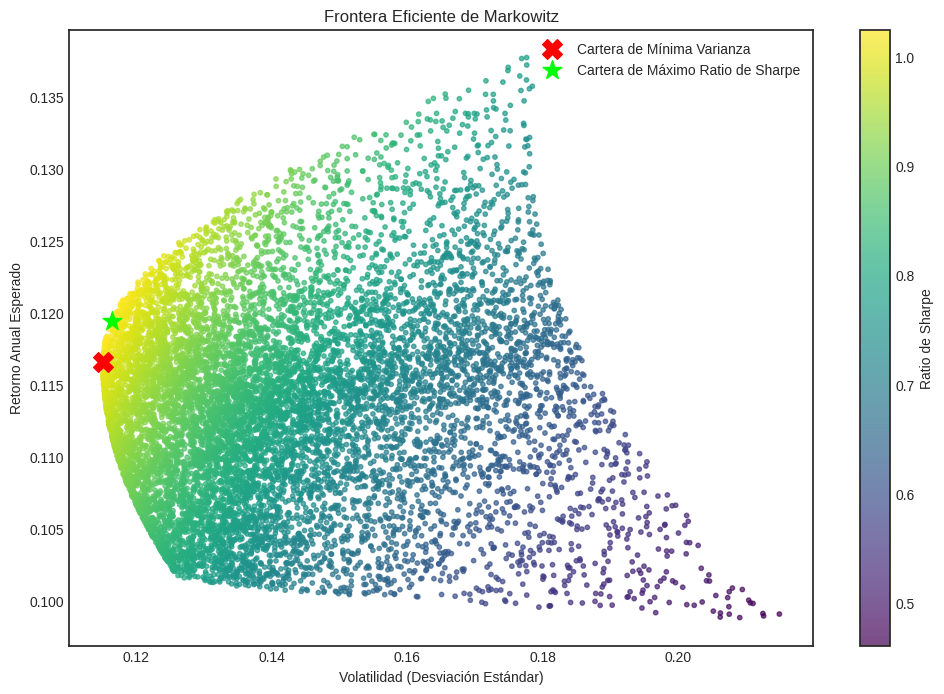

In [ ]:
# 8. Gráfico de la frontera eficiente
plt.figure(figsize=(12, 8))
plt.scatter(df_resultados['Volatilidad'], df_resultados['Retorno'], c=df_resultados['Ratio de Sharpe'], cmap='viridis', s=10, alpha=0.7)
plt.colorbar(label='Ratio de Sharpe')
plt.title('Frontera Eficiente de Markowitz')
plt.xlabel('Volatilidad (Desviación Estándar)')
plt.ylabel('Retorno Anual Esperado')
plt.scatter(cartera_min_varianza['Volatilidad'], cartera_min_varianza['Retorno'], color='red', marker='X', s=200, label='Cartera de Mínima Varianza')
plt.scatter(cartera_max_sharpe['Volatilidad'], cartera_max_sharpe['Retorno'], color='lime', marker='*', s=200, label='Cartera de Máximo Ratio de Sharpe')
plt.legend()
plt.show()

<Figure size 1200x800 with 0 Axes>

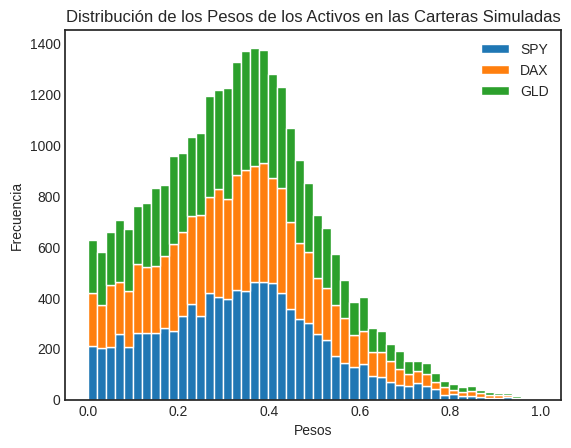

In [ ]:
# 9. Gráfico de la distribución de pesos de las carteras

plt.figure(figsize=(12, 8))

# Crea el DataFrame y especifica el tipo de dato como float (o un tipo numérico)
pesos_df = pd.DataFrame(index=range(num_carteras), columns=activos, dtype=float)

for i in range(num_carteras):
    pesos = np.random.random(len(activos))
    pesos /= np.sum(pesos)
    pesos_df.iloc[i] = pesos

pesos_df.plot.hist(stacked=True, bins=50)
plt.title('Distribución de los Pesos de los Activos en las Carteras Simuladas')
plt.xlabel('Pesos')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.show()